In [6]:
import os
import numpy as np
from numpy.linalg import eigvalsh
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, kron
from itertools import product, combinations
import plotly.graph_objects as go
from scipy.linalg import expm, sinm, cosm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})  # Change 12 to the desired font size
# Enable LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.set_printoptions(edgeitems=10)  # Set the number of elements at the beginning and end of each dimension when repr is called
np.set_printoptions(threshold=1000)  # Set the total number of array elements which trigger summarization rather than full repr
np.set_printoptions(precision=4)  # Set the precision for floating point output

ar = np.array
kr = np.kron
T = np.transpose

from MDS import *

pauli_z=ar([[1,0],[0,-1]])
pauli_y=ar([[0,-1j],[1j,0]])
pauli_x=ar([[0,1],[1,0]])

import warnings
warnings.filterwarnings('ignore')

mds_from_d_3D = MDS(3,dissimilarity='euclidean')
mds_from_d_2D = MDS(2,dissimilarity='euclidean')


Rather than averaging the couplings, we use multiple instances (k=0 to k=12) goe_xxyyzz and average over the stress. We also repeat this for goe_local2

0
[ 1.3452e+02  9.0042e+01  7.6898e+01  6.9788e+01  4.7489e+01  4.5142e+01
  2.7915e+01  2.5329e+01  1.4661e+01  1.1787e+01  6.1248e+00 -6.0922e-15]
1
[1.0716e+02 7.6430e+01 6.4008e+01 5.5090e+01 4.8730e+01 4.0517e+01
 3.3972e+01 2.6499e+01 1.9883e+01 1.4161e+01 5.1948e+00 1.3940e-14]
2
[1.0311e+02 7.7137e+01 5.8364e+01 5.0797e+01 4.2327e+01 3.7824e+01
 3.0196e+01 2.5019e+01 1.8950e+01 9.6635e+00 6.0803e+00 8.7925e-15]
3
[ 1.0699e+02  8.1158e+01  5.8797e+01  5.1843e+01  4.7544e+01  3.7706e+01
  3.6001e+01  2.0890e+01  1.7695e+01  1.2548e+01  1.3403e+00 -2.1814e-14]
4
[ 1.0498e+02  7.8763e+01  7.4351e+01  5.5386e+01  5.1301e+01  3.9403e+01
  3.0808e+01  2.5749e+01  1.8743e+01  1.1029e+01  6.3801e+00 -1.6704e-15]
5
[1.1562e+02 8.5337e+01 6.4749e+01 5.4866e+01 4.9681e+01 4.2150e+01
 3.1328e+01 2.3122e+01 1.6253e+01 1.3484e+01 2.0584e+00 8.2446e-15]
6
[ 1.3205e+02  8.2203e+01  6.7814e+01  4.5803e+01  4.2734e+01  4.0213e+01
  2.8760e+01  2.3385e+01  1.6090e+01  9.6632e+00  2.2698e+00 -9.772

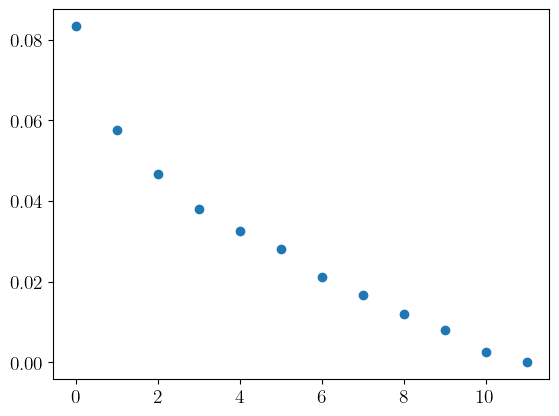

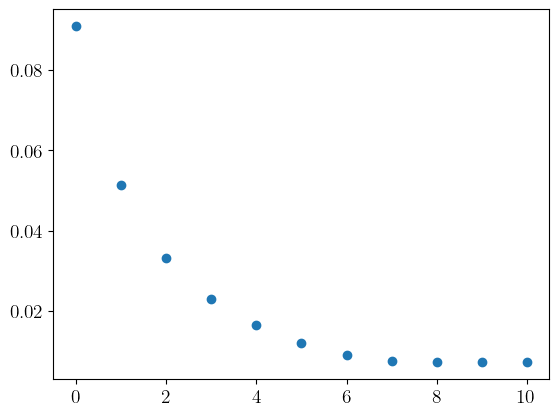

In [11]:
range_k=8
folder = 'goe_xxyyzz'
N=12
state_number=0
eigen_avg=np.zeros(N)
stress_avg=np.zeros(N-1)
for k in range(range_k):
    file_name=folder+f"{N}_{k}_{state_number}"
    dab=load_d(file_name)
    stress_avg+=get_stress(dab,False)
    eigen_avg+=get_eigenvalues_B_from_dab(dab,N,file_name,False)
eigen_avg=eigen_avg/(N*max(eigen_avg))
stress_avg=stress_avg/((N-1)*max(stress_avg))
plt.scatter(range(len(eigen_avg)),eigen_avg)
plt.show()

plt.scatter(range(len(stress_avg)),stress_avg)
plt.show()
